In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='housing (task4).csv'
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data=pd.read_csv(filename,skipinitialspace=True,delim_whitespace=True,names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.dropna()
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

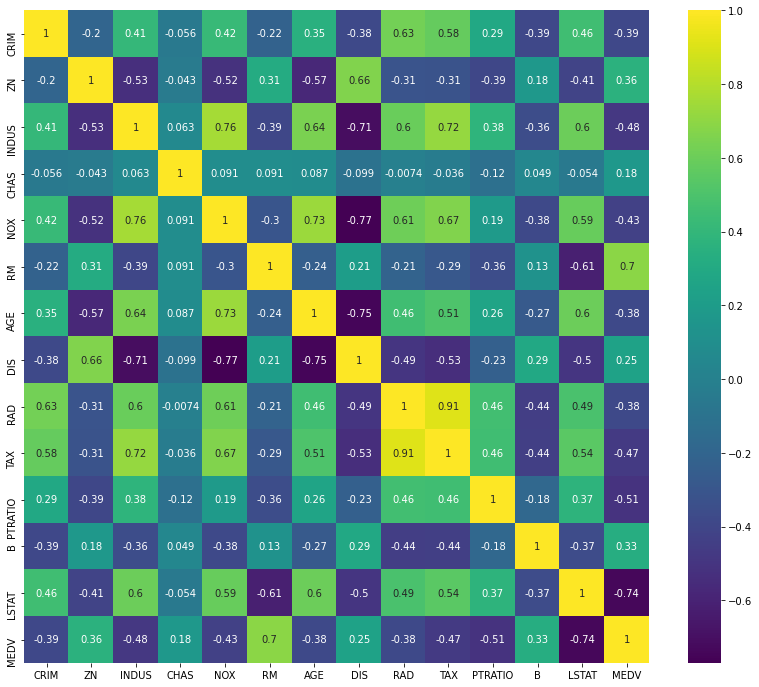

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),cmap='viridis',annot=True,fmt='.2g')

In [8]:
values=data.values
X=values[:,:13]
y=values[:,-1]
print("Shape of X is ",X.shape)
print("Shape of y is",y.shape)

Shape of X is  (506, 13)
Shape of y is (506,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler=MinMaxScaler(feature_range=(0,1))
scaled_X=scaler.fit_transform(X)
print(X[0,:])

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [10]:
seed=1
test_size=0.2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

models=[]
models.append(('Linear Regression',LinearRegression()))
models.append(('Elastic Net',ElasticNet()))
models.append(('Random Forest',RandomForestRegressor()))
models.append(("Gradient Boosting ",GradientBoostingRegressor()))
models.append(('Decision Tree ',DecisionTreeRegressor()))
models.append(('Support Vector ',SVR()))


In [11]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=test_size,random_state=seed)

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
k_folds=5
scoring='r2'
names=[]
results=[]

for name,model in models:
  kfold=KFold(n_splits=k_folds,shuffle=True,random_state=seed)
  cv_result=cross_val_score(model,X_train,y_train,scoring=scoring,cv=kfold)
  results.append(cv_result)
  names.append(name)
  msg="%s %f (%f)"%(name,cv_result.mean(),cv_result.std())
  print(msg)


Linear Regression 0.702109 (0.059463)
Elastic Net 0.154157 (0.050380)
Random Forest 0.842550 (0.058978)
Gradient Boosting  0.866621 (0.047254)
Decision Tree  0.713895 (0.112509)
Support Vector  0.583028 (0.126429)


In [31]:
model1=DecisionTreeRegressor(max_depth=20)
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
print(r2_score(y_test,prediction1))

0.8237558920434325


In [32]:
model2=GradientBoostingRegressor(n_estimators=100)
model2.fit(X_train,y_train)
predict2=model2.predict(X_test)
print(r2_score(y_test,predict2))

0.9219868556267756
